In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/prateeklodha/Desktop/data analysis/data_jobs.csv')
df['job_posted_date']=pd.to_datetime(df.job_posted_date)


import ast

def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    

df['job_skills'] = df['job_skills'].apply(clean_list)

In [11]:
import seaborn as sns

In [14]:
df_da_us = df[(df['job_title_short']=="Data Analyst") & (df["job_country"]=="United States")].copy()

df_da_us = df_da_us.dropna(subset='salary_year_avg')
df_da_us = df_da_us.explode('job_skills')
df_da_us[['job_skills', 'salary_year_avg']]


,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0
...,...,...
784882,sql,87500.0
784882,vba,87500.0
784882,tableau,87500.0
784882,excel,87500.0


In [15]:
df_da_top = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
df_da_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)

df_da_skills

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


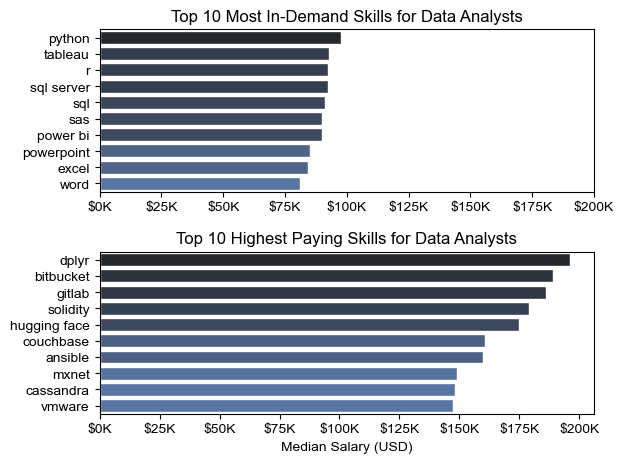

In [22]:
fig,ax = plt.subplots(2,1)

# df_da_top.plot(kind='barh', y='median', ax=ax[0], legend=False)

sns.set_theme(style='ticks')
sns.barplot(data=df_da_top, x='median', y=df_da_top.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False )
# ax[0].invert_yaxis()
ax[0].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))

# df_da_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)


sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='dark:b_r' , legend=False )
# ax[1].invert_yaxis()
ax[1].set_title('Top 10 Highest Paying Skills for Data Analysts')
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))

ax[0].set_xlim(0,200000)
fig.tight_layout()

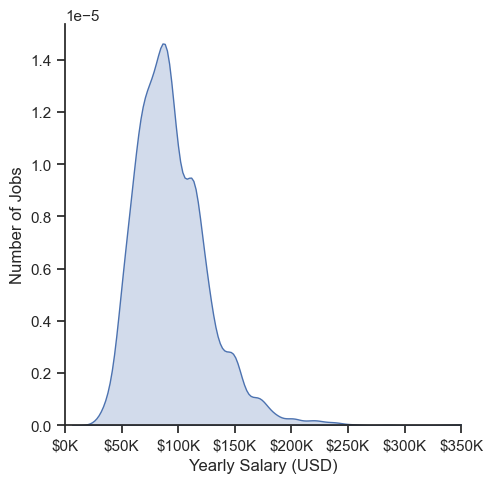

In [27]:
# df_da_us = df[(df['job_title_short']=="Data Analyst") & (df["job_country"]=="United States")].copy()

# df_da_us['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black', xlim=(0,250000))


sns.displot(df_da_us['salary_year_avg'], kind='kde', fill=True)

plt.xlabel('Yearly Salary (USD)')

plt.ylabel('Number of Jobs')
plt.xlim(0,350000)


ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))